In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import QTable
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [8]:
ravetable = QTable.read('NEW_rave_tgas_query.csv', format='csv')
#parallax error error fixed!

In [9]:
print(ravetable)

row_id    ID_TGAS_source        RA_TGAS       ... phot_g_mean_mag_TGAS   HRV  
------ ------------------- ------------------ ... -------------------- -------
     1 5472450241103924224 156.23182631221437 ...      9.8990624156966  17.929
     2 5472934404177638016  155.6757147543367 ...    9.669932745468348   27.33
     3 5472961651450144128 155.67257158269777 ...    9.403665589028403   12.13
     4 5470860587808517120  158.9734503220959 ...   10.119686672861922  38.949
     5 3468060163078890752 184.89737863576525 ...   10.123850113157598  10.372
     6 6158339888161766400 188.61283657498848 ...    9.852586829713339  34.075
     7 6158610402382100096  188.1046316601183 ...    9.620809841126782 -20.148
     8 6158160633407813888 188.96842670922464 ...    9.936459984602394  36.845
     9 6123173658014875136 213.83424541365062 ...   10.767653224679348 -11.692
    10 6123181698193650176 213.84389869951852 ...    9.535751921865415   7.105
   ...                 ...                ... ...   

In [10]:
pmra = ravetable['pmRA_TGAS']
pmde = ravetable['pmDE_TGAS']
ra = ravetable['RA_TGAS']
dec = ravetable['DE_TGAS']
hrv = ravetable['HRV']
plx = ravetable['parallax_TGAS']
pm = np.sqrt(pmde**2 + (pmra**2) * np.cos(dec)**2)

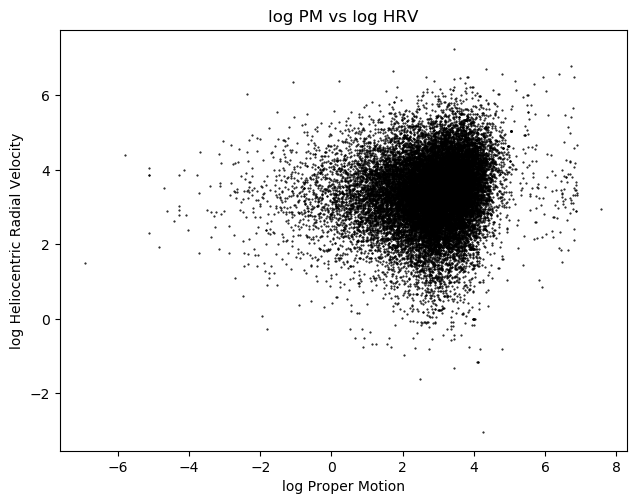

In [11]:
plt.style.use('default')
fig = plt.figure()
ax = fig.add_subplot(111)
#fig.set_size_inches(8,8)
 
fig.tight_layout()

ax.set_ylabel("log Heliocentric Radial Velocity")
ax.set_xlabel("log Proper Motion")
ax.set_title("log PM vs log HRV")
    
ax.plot(np.log(hrv), np.log(pm), color='k', marker='.', markersize=1, linestyle='None');

In [12]:
pmra = pmra * 0.001
pmde = pmde * 0.001
plx = plx * 0.001

In [13]:
rangp = np.radians(192.8583)
decngp = np.radians(27.1280559)
theta0 = np.radians(122.93191857)
k = 4.704057

In [14]:
a = np.cos(theta0)
b = np.sin(theta0)
c = np.sin(decngp)
d = np.cos(decngp)
e = np.cos(rangp)
f = np.sin(rangp)
g = np.cos(ra)*np.cos(dec)
h = np.sin(ra)
i = np.sin(ra)*np.cos(dec)
j = np.cos(ra)
z = np.sin(ra)*np.sin(dec)
l = np.sin(dec)
m = np.cos(dec)

In [15]:
q = ((-e*a*c - b*f)*g + (-a*c*f + e*b)*i + a*d*l)
r = (j*(-a*c*f + e*b) - h*(-e*a*c - b*f))
s = (-g*(-e*a*c - b*f) - z*(-a*c*f + e*b) + a*d*m)
t = ((-a*f - e*b*c)*g + (-e*a - b*c*f)*i + b*d*l)
u = (j*(-e*a - c*b*f) - h*(a*f - e*b*c))
v = (-g*(a*f - e*c*b) - z*(-e*a - c*b*f) + b*d*m)
w = (e*d*g + d*f*i + c*l)
x = (d*i*f - e*d*h)
y = (-e*d*g - d*z*f + c*m)

ucoord = (q*hrv + r*(k*pmra/plx) + s*(k*pmde/plx))
vcoord = (t*hrv + u*(k*pmra/plx) + v*(k*pmde/plx))
wcoord = (w*hrv + x*(k*pmra/plx) + y*(k*pmde/plx))

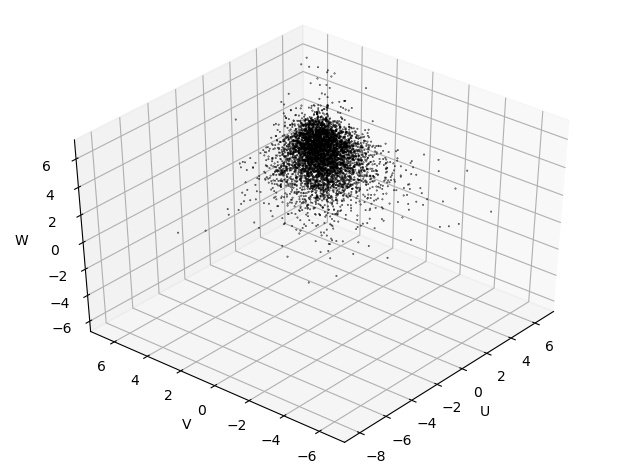

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

fig.tight_layout()

ax.set_xlabel("U")
ax.set_ylabel("V")
ax.set_zlabel("W")

ax.scatter(np.log(ucoord), np.log(vcoord), np.log(wcoord), c = 'k', s=0.1, alpha=1);
ax.view_init(azim = -140, elev = 40);

In [32]:
import ipyvolume as ipv
ipv.quickscatter(np.log(ucoord), np.log(vcoord), np.log(wcoord), size=0.5, color="blue")